## Purpose of the project
The goal, as a Machine Learning Engineer team member, is to: 
- create an algorithm that will detect fraudulent transactions;
- put in place an infrastructure that will receive real time payment information (from a Jedha API);
- send the prediction to a specific center that will notify the team when a transaction is fraudulent.

### I - Import of librairies and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt

import datetime
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
dataset = pd.read_csv("https://lead-program-assets.s3.eu-west-3.amazonaws.com/M05-Projects/fraudTest.csv")

### II - Dataset information

In [3]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Number of columns : {}".format(dataset.shape[1]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

print("Columns type")
display(dataset.info())

Number of rows : 555719

Number of columns : 23

Display of dataset: 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0



Basics statistics: 


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,555719,555719,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,849,50,NaN,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,NaN,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,2423,40393,NaN,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,NaN,NaN,48842.628015,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,NaN,NaN,26855.283328,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1257.000000,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,NaN,NaN,26292.000000,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,NaN,NaN,48174.000000,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,NaN,NaN,72011.000000,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000



Percentage of missing values: 


Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

Columns type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   

None

### III - Data engineering

#### 1 - Datetime columns

In [4]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])
dataset['dob'] = pd.to_datetime(dataset['dob'])

#### a - Age

In [5]:
nb_of_days = dataset['trans_date_trans_time'] - dataset['dob']
diff_days = nb_of_days / np.timedelta64(1, 'D')

dataset['age'] = round(diff_days / 365)

dataset = dataset.drop(['dob'], axis=1)

#### b - Date

In [6]:
dataset['year'] = dataset['trans_date_trans_time'].apply(lambda x : x.year)
dataset['month'] = dataset['trans_date_trans_time'].apply(lambda x : x.month)
dataset['day'] = dataset['trans_date_trans_time'].apply(lambda x : x.day)
dataset['dayofweek'] = dataset['trans_date_trans_time'].apply(lambda x : x.dayofweek)
dataset['hour'] = dataset['trans_date_trans_time'].apply(lambda x : x.hour)
dataset = dataset.drop(['trans_date_trans_time'], axis=1)

#### b - Distance between client and merchant locations

In [7]:
def calculate_distance(row):
    point1 = (row['lat'], row['long'])
    point2 = (row['merch_lat'], row['merch_long'])
    return geodesic(point1, point2).km

dataset['distance'] = dataset.apply(calculate_distance, axis=1)
dataset['distance'] = dataset['distance'].round()
dataset = dataset.drop(['lat', 'long', 'merch_lat', 'merch_long'], axis=1)

## EDA

In [8]:
fig = px.pie(dataset, names='is_fraud', title= 'Target repartition')
fig.update_layout(title_x=0.5, legend=dict(x= 0.7))
fig.show(); 

In [9]:
dataset.head(5)

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,trans_num,unix_time,is_fraud,age,year,month,day,dayofweek,hour,distance
0,0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,52.0,2020,6,21,6,12,25.0
1,1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,0,30.0,2020,6,21,6,12,105.0
2,2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,34496,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,0,50.0,2020,6,21,6,12,59.0
3,3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,54767,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,33.0,2020,6,21,6,12,28.0
4,4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,1126,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1371816917,0,65.0,2020,6,21,6,12,104.0


In [10]:
features = ['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'age', 'hour', 'dayofweek', 'distance']
for i in range(len(features)):
    fig = px.histogram(dataset, x=features[i])  # Specify the x-axis feature
    fig.update_layout(xaxis_title=features[i])  # Set the x-axis title to the feature name
    fig.show()


Output hidden; open in https://colab.research.google.com to view.

#### Comparison : Fraud vs. Non-Fraud

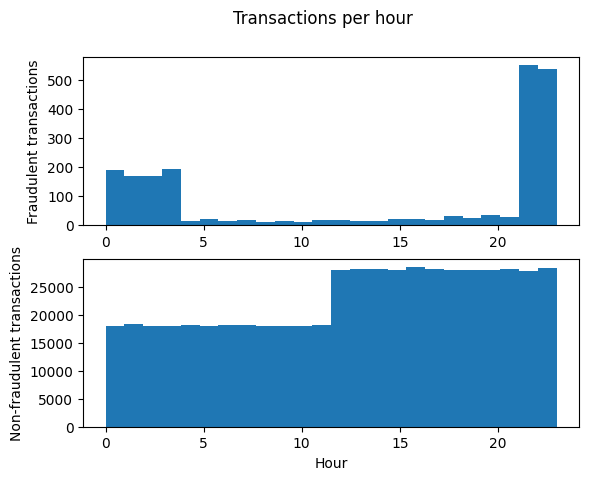

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bins = 24
fig.suptitle('Transactions per hour')

ax1.hist(dataset.hour[dataset.is_fraud == 1], bins)
ax1.set_ylabel('Fraudulent transactions')

ax2.hist(dataset.hour[dataset.is_fraud == 0], bins)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Non-fraudulent transactions')

plt.show()

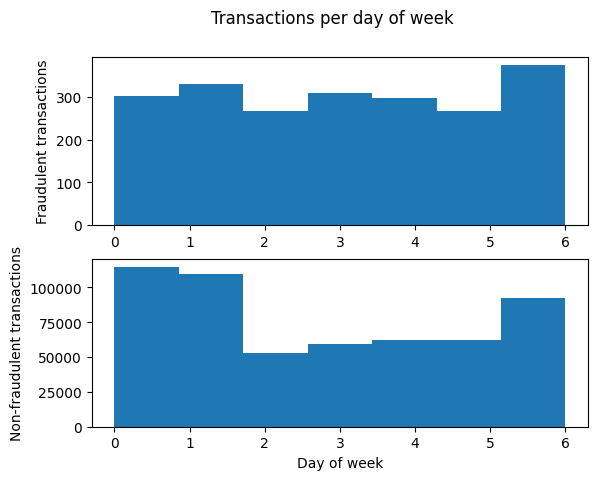

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bins = 7
fig.suptitle('Transactions per day of week')

ax1.hist(dataset.dayofweek[dataset.is_fraud == 1], 7)
ax1.set_ylabel('Fraudulent transactions')

ax2.hist(dataset.dayofweek[dataset.is_fraud == 0], bins)
ax2.set_xlabel('Day of week')
ax2.set_ylabel('Non-fraudulent transactions')

plt.show()

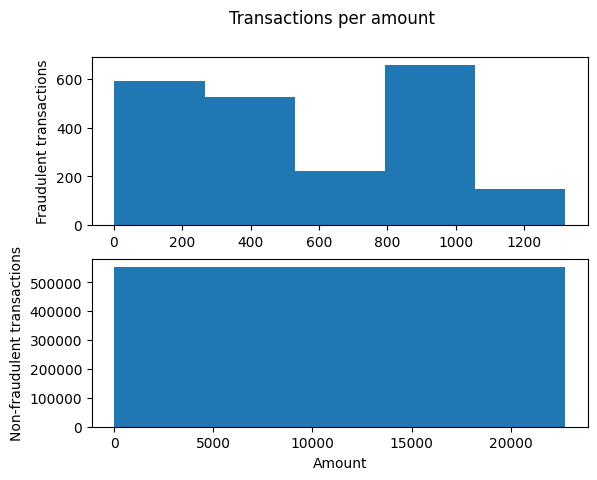

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Transactions per amount')
bins = 5

ax1.hist(dataset.amt[dataset.is_fraud == 1], bins)
ax1.set_ylabel('Fraudulent transactions')

ax2.hist(dataset.amt[dataset.is_fraud == 0], bins=1)
ax2.set_xlabel('Amount')
ax2.set_ylabel('Non-fraudulent transactions')

plt.show()

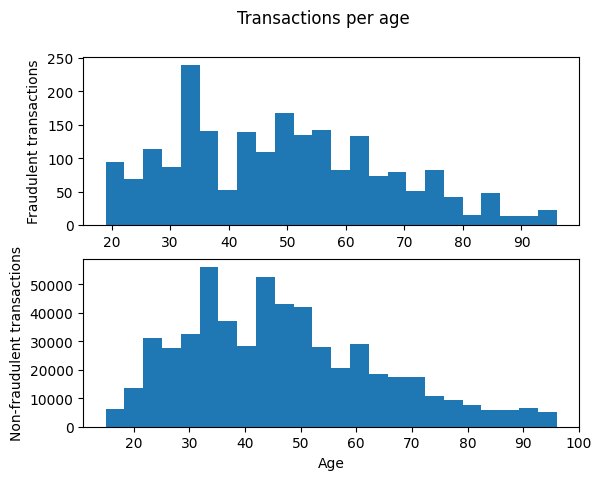

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bins = 24
fig.suptitle('Transactions per age')

ax1.hist(dataset.age[dataset.is_fraud == 1], bins)
ax1.set_ylabel('Fraudulent transactions')

ax2.hist(dataset.age[dataset.is_fraud == 0], bins)
ax2.set_xlabel('Age')
ax2.set_ylabel('Non-fraudulent transactions')

plt.show()

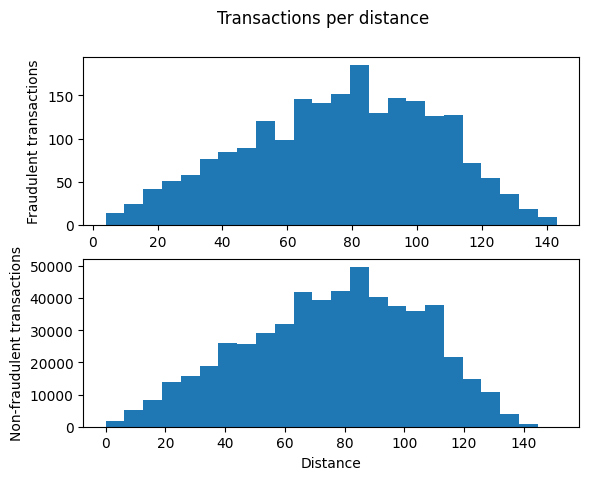

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
bins = 24
fig.suptitle('Transactions per distance')

ax1.hist(dataset.distance[dataset.is_fraud == 1], bins)
ax1.set_ylabel('Fraudulent transactions')

ax2.hist(dataset.distance[dataset.is_fraud == 0], bins)
ax2.set_xlabel('Distance')
ax2.set_ylabel('Non-fraudulent transactions')

plt.show()

## ML Algo

##### Preprocessing

In [16]:
dataset = dataset.drop(['cc_num', 'merchant', 'Unnamed: 0', 'first', 'last', 'trans_num', 'street', 'city', 'state', 'zip', 'unix_time'], axis=1)

In [17]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['category', 'amt', 'gender', 'city_pop', 'job', 'age',
       'year', 'month', 'day', 'dayofweek', 'hour', 'distance'] 
                
target_variable = 'is_fraud'

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

X :
         category    amt gender  city_pop                     job   age  year  \
0   personal_care   2.86      M    333497     Mechanical engineer  52.0  2020   
1   personal_care  29.84      F       302  Sales professional, IT  30.0  2020   
2  health_fitness  41.28      F     34496       Librarian, public  50.0  2020   
3        misc_pos  60.05      M     54767            Set designer  33.0  2020   
4          travel   3.19      M      1126      Furniture designer  65.0  2020   

   month  day  dayofweek  hour  distance  
0      6   21          6    12      25.0  
1      6   21          6    12     105.0  
2      6   21          6    12      59.0  
3      6   21          6    12      28.0  
4      6   21          6    12     104.0  


In [18]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, random_state = 42, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [19]:
# Create pipeline for numeric features
numeric_features = ["amt", "city_pop", "age", "year", "month", "day", "dayofweek", "hour", "distance"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

In [20]:
# Create pipeline for categorical features
categorical_features = ["category", "job"] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    # missing values will be replaced by most frequent value
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    # Categorical variables represented as binary vectors & first column will be dropped to avoid creating correlations between features
    ('encoder', OneHotEncoder(drop='first')) 
    ])

In [21]:
X_train

,category,amt,gender,city_pop,job,age,year,month,day,dayofweek,hour,distance
469756,misc_pos,75.51,F,71485,Leisure centre manager,46.0,2020,12,13,6,9,67.0
351269,personal_care,2.04,M,9165,Medical secretary,57.0,2020,11,3,1,15,6.0
170889,food_dining,62.19,M,68211,"Engineer, petroleum",79.0,2020,8,20,3,0,110.0
414425,shopping_net,9.05,M,5196,Child psychotherapist,43.0,2020,11,30,0,18,87.0
29086,misc_pos,306.65,F,1383,Manufacturing engineer,21.0,2020,6,30,1,19,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
425603,grocery_pos,211.31,F,2906700,Animator,37.0,2020,12,3,3,2,131.0
223907,food_dining,69.09,M,409656,Heritage manager,35.0,2020,9,8,1,19,131.0
536871,shopping_net,8.27,F,133,Professor Emeritus,67.0,2020,12,28,0,0,32.0
353653,home,67.23,F,4913,Technical brewer,54.0,2020,11,4,2,19,89.0


In [22]:
# Use ColumnTransformer to apply the different preprocessing steps to the various columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
             category     amt gender  city_pop                     job   age  \
469756       misc_pos   75.51      F     71485  Leisure centre manager  46.0   
351269  personal_care    2.04      M      9165       Medical secretary  57.0   
170889    food_dining   62.19      M     68211     Engineer, petroleum  79.0   
414425   shopping_net    9.05      M      5196   Child psychotherapist  43.0   
29086        misc_pos  306.65      F      1383  Manufacturing engineer  21.0   

        year  month  day  dayofweek  hour  distance  
469756  2020     12   13          6     9      67.0  
351269  2020     11    3          1    15       6.0  
170889  2020      8   20          3     0     110.0  
414425  2020     11   30          0    18      87.0  
29086   2020      6   30          1    19      29.0  
...Done.
  (0, 0)	0.0390182977974077
  (0, 1)	-0.054665565864228674
  (0, 2)	-0.05250318525559083
  (0, 4)	1.2579519825796817
  (0, 5)	-0.387954299146470

##### Save and load preprocessing

In [23]:
import pickle

# Save preprocessor object
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

##### Training - Decision Tree

In [24]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best validation accuracy :  0.9982622243044963


##### Save model

In [25]:
# Train the model with best hyperparameters
best_params = gridsearch.best_params_
classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    min_samples_split=best_params['min_samples_split'])
classifier.fit(X_train, Y_train)

# Save the trained model to a file
with open('decision_tree.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [26]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[9.99772258e-01 2.27741700e-04]
 [9.99772258e-01 2.27741700e-04]
 [9.93471164e-01 6.52883569e-03]
 ...
 [9.99222798e-01 7.77202073e-04]
 [9.99772258e-01 2.27741700e-04]
 [9.99772258e-01 2.27741700e-04]]



In [27]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[9.99772258e-01 2.27741700e-04]
 [9.99222798e-01 7.77202073e-04]
 [9.99772258e-01 2.27741700e-04]
 ...
 [9.99772258e-01 2.27741700e-04]
 [9.99772258e-01 2.27741700e-04]
 [9.99772258e-01 2.27741700e-04]]



In [28]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9989074634385853
accuracy on test set :  0.998602413685549

f1-score on training set :  0.8406449193850768
f1-score on test set :  0.797918473547268



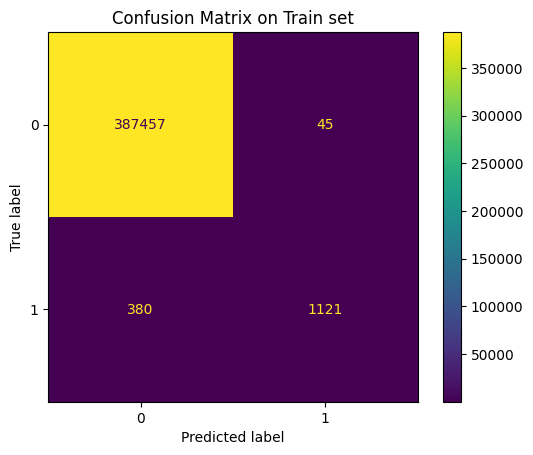

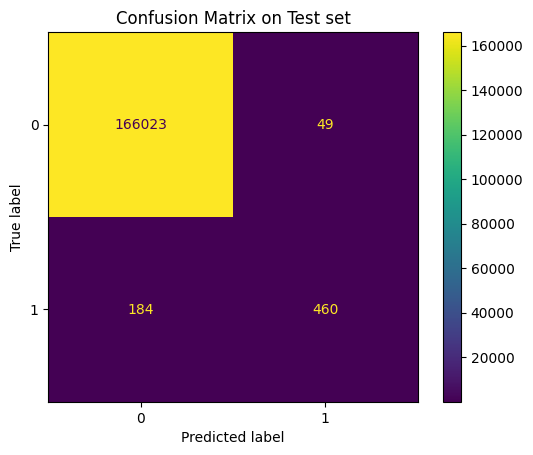

In [29]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

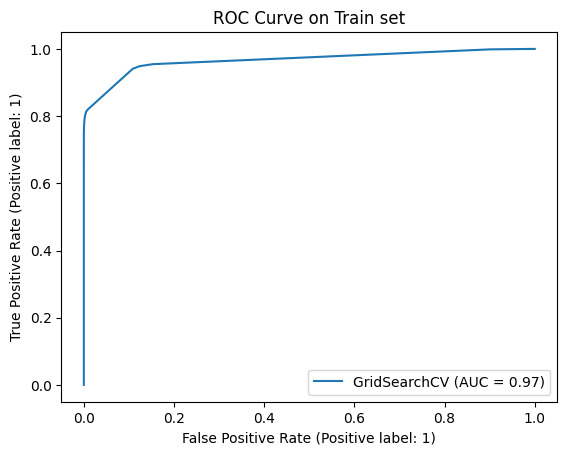

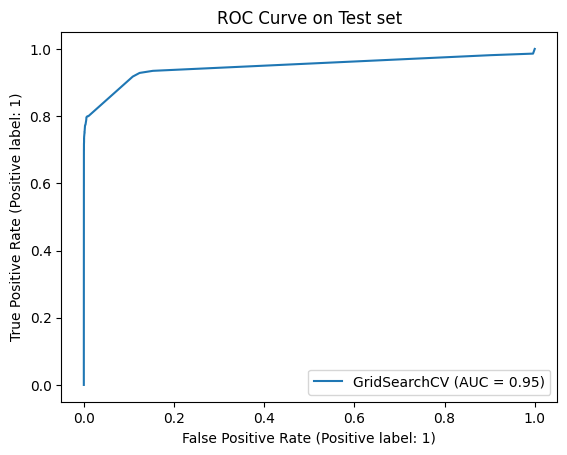

In [30]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()